In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from numberline import *
import voting_rules as rules
from utility import get_continuous_weights, calculate_loss

# Initial Setup and Testing

In [37]:
min_val = 0
max_val = 10
size = 4

true_pref = (max_val - min_val) / 2 + min_val
vals = np.random.uniform(low=min_val, high=max_val, size=size)
print(vals)

[6.67981763 5.53087119 1.30164342 0.85623758]


In [38]:
unweighted_result_mean = rules.mean(vals)
unweighted_loss_mean = calculate_loss(unweighted_result_mean, true_pref)

weighted_vals = get_continuous_weights(vals, min_val, max_val)
weighted_result_mean = rules.weighted_mean(weighted_vals)
weighted_loss_mean = calculate_loss(weighted_result_mean, true_pref)

print("MEAN")
print(f"True preference: {true_pref}")
print(f"Unweighted result: {unweighted_result_mean}")
print(f"\tLoss: {unweighted_loss_mean}")
print(f"Weighted result: {weighted_result_mean}")
print(f"\tLoss: {weighted_loss_mean}")
print(
    f"Better result: {'UNWEIGHTED' if unweighted_loss_mean <= weighted_loss_mean else 'WEIGHTED'}")
print(f"\tDifference: {abs(unweighted_loss_mean - weighted_loss_mean)}")

MEAN
True preference: 5.0
Unweighted result: 3.5921424558220303
	Loss: 1.9820628646988239
Weighted result: 4.485476592545754
	Loss: 0.26473433681832803
Better result: WEIGHTED
	Difference: 1.717328527880496


In [39]:
unweighted_result_median = rules.median(vals)
unweighted_loss_median = calculate_loss(unweighted_result_median, true_pref)

weighted_vals = get_continuous_weights(vals, min_val, max_val)
weighted_result_median = rules.weighted_median(weighted_vals)
weighted_loss_median = calculate_loss(weighted_result_median, true_pref)

print("MEDIAN")
print(f"True preference: {true_pref}")
print(f"Unweighted result: {unweighted_result_median}")
print(f"\tLoss: {unweighted_loss_median}")
print(f"Weighted result: {weighted_result_median}")
print(f"\tLoss: {weighted_loss_median}")
print(
    f"Better result: {'UNWEIGHTED' if unweighted_loss_median <= weighted_loss_median else 'WEIGHTED'}")
print(f"\tDifference: {abs(unweighted_loss_median - weighted_loss_median)}")

MEDIAN
True preference: 5.0
Unweighted result: 1.3016434187074821
	Loss: 13.677841402389678
Weighted result: 5.53087118850876
	Loss: 0.28182421878870345
Better result: WEIGHTED
	Difference: 13.396017183600975


True preference: green
Unweighted result: red
Weighted result: purple

Best weighted rule: MEAN
Best unweighted rule: MEAN


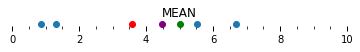

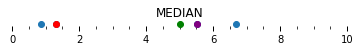

In [40]:
print(f"True preference: green")
print(f"Unweighted result: red")
print(f"Weighted result: purple")

print()
print(
    f"Best weighted rule: {'MEDIAN' if weighted_loss_median < weighted_loss_mean else 'TIE' if weighted_loss_median == weighted_loss_mean else 'MEAN'}")
print(
    f"Best unweighted rule: {'MEDIAN' if unweighted_loss_median < unweighted_loss_mean else 'TIE' if unweighted_loss_median == unweighted_loss_mean else 'MEAN'}")

ax = numberline(vals, min_val, max_val)
ax.scatter(true_pref, 0, clip_on=False, zorder=3, color='green')
ax.scatter(unweighted_result_mean, 0, clip_on=False, zorder=3, color='red')
ax.scatter(weighted_result_mean, 0, clip_on=False, zorder=3, color='purple')
plt.title("MEAN")

ax = numberline(vals, min_val, max_val)
ax.scatter(true_pref, 0, clip_on=False, zorder=3, color='green')
ax.scatter(unweighted_result_median, 0, clip_on=False, zorder=3, color='red')
ax.scatter(weighted_result_median, 0, clip_on=False, zorder=3, color='purple')
plt.title("MEDIAN");

# Mimic Paper Results

In [41]:
samples = 100

min_val = 0
max_val = 10
true_pref = (max_val - min_val) / 2 + min_val

mechanisms = {
    "mean"           : rules.mean,
    "weighted_mean"  : lambda v: rules.weighted_mean(
        get_continuous_weights(v, min_val, max_val)),
    "median"         : rules.median,
    "weighted_median": lambda v: rules.weighted_median(
        get_continuous_weights(v, min_val, max_val)),
}

df_data = pd.DataFrame(columns=["voters", "rule", "result", "loss"])

for voters in range(1, 100 + 1):
   for rule, exe in mechanisms.items():
      for _ in range(samples):
         vals = np.random.uniform(low=min_val, high=max_val, size=voters)
         result = exe(vals)
         loss = calculate_loss(result, true_pref)
         df_data.loc[len(df_data)] = [voters, rule, result, loss]
df_data

,voters,rule,result,loss
0,1,mean,9.822559,23.257076
1,1,mean,2.168008,8.020181
2,1,mean,9.750031,22.562793
3,1,mean,4.427274,0.328015
4,1,mean,2.169606,8.011132
...,...,...,...,...
39995,100,weighted_median,4.960104,0.001592
39996,100,weighted_median,4.977852,0.000491
39997,100,weighted_median,4.978142,0.000478
39998,100,weighted_median,4.993934,0.000037


In [42]:
df_means = df_data.groupby(["voters", "rule"]).mean()
df_means

result      loss
voters rule                               
1      mean             5.052557  8.269092
       median           5.172530  8.310462
       weighted_mean    4.853370  7.734424
       weighted_median  4.622268  9.057494
2      mean             4.975631  3.606486
...                          ...       ...
99     weighted_median  4.992691  0.003930
100    mean             4.972945  0.093362
       median           4.960842  0.270928
       weighted_mean    5.000545  0.000010
       weighted_median  4.992449  0.003821

[400 rows x 2 columns]

In [47]:
df_mean_ratios = df_means.loc[:, "mean", :] / df_means.loc[:, "weighted_mean", :]
df_mean_ratios["rule"] = "mean"
df_mean_ratios["log_loss_ratio"] = np.log(df_mean_ratios["loss"])
df_mean_ratios

,result,loss,rule,log_loss_ratio
voters,,,,
1,1.041041,1.069128,mean,0.066844
2,1.032390,1.925196,mean,0.655028
3,1.014094,2.092699,mean,0.738454
4,0.989917,3.870570,mean,1.353402
5,1.013589,6.217794,mean,1.827415
...,...,...,...,...
96,1.003118,14358.465756,mean,9.572095
97,1.011487,5120.210389,mean,8.540951
98,0.996876,7230.646498,mean,8.886084


In [48]:
df_median_ratios = df_means.loc[:, "median", :] / df_means.loc[:, "weighted_median", :]
df_median_ratios["rule"] = "median"
df_median_ratios["log_loss_ratio"] = np.log(df_median_ratios["loss"])
df_median_ratios

,result,loss,rule,log_loss_ratio
voters,,,,
1,1.119046,0.917523,median,-0.086077
2,0.692527,2.058565,median,0.722009
3,1.027528,2.056536,median,0.721023
4,0.750479,4.140659,median,1.420855
5,0.932305,3.391636,median,1.221312
...,...,...,...,...
96,1.006031,40.957430,median,3.712533
97,1.000520,30.276512,median,3.410372
98,0.986783,66.882227,median,4.202933


<AxesSubplot:xlabel='voters', ylabel='log_loss_ratio'>

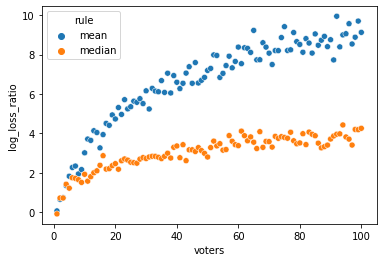

In [52]:
df_combined_ratios = pd.concat([df_mean_ratios, df_median_ratios]).reset_index()
sns.scatterplot(x="voters", y="log_loss_ratio", hue="rule", data=df_combined_ratios)